<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center">Design an application for public health - Project 3</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;" >
    <h2 style="width: 100%; text-align: center; float: left;" align="center">| Analysis notebook |</h2>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <h3 style="width: 100%; text-align: center; font-size:26px; float: left;" align="center">Data Scientist course - OpenClassrooms</h3>
</div>

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and functions</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries and functions</h3>
</div>

In [47]:
import os
import io
import gc
import itertools
import math
from math import prod
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


%matplotlib inline
sns.set_theme(style="darkgrid")

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">1.2. Functions declaration</h4>
</div>

In [2]:
def df_analysis(df, name_df, columns, *args, **kwargs):
    """
    Method used for analyzing on the DataFrame.

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze
        name_df (str): Dataset name
        columns (list): Dataframe keys in list format
        
        *args, **kwargs:
        -----------------
            flag (str): Flag to show complete information about the dataset to analyse
                        "complete" shows all information about the dataset

    Returns:
    -----------------
        None. 
        Print the analysis on the Dataset. 
    """
    
    # Getting the variables
    flag = kwargs.get("flag", None)
    
    ORDERING_COMPLETE = [
        "name", "type", "records", "unique", "# NaN", "% NaN", "mean", "min", "25%", "50%", "75%", "max", "std"
    ]
    
    # Calculating the memory usage based on dataframe.info()
    buf = io.StringIO()
    df.info(buf=buf)
    memory_usage = buf.getvalue().split('\n')[-2]
    
    if df.empty:
        print("The", name_df, "dataset is empty. Please verify the file.")
    else:
        empty_cols = [col for col in df.columns if df[col].isna().all()] # identifying empty columns
        df_rows_duplicates = df[df.duplicated()] #identifying full duplicates rows
        
        # Creating a dataset based on Type object and records by columns
        type_cols = df.dtypes.apply(lambda x: x.name).to_dict() 
        df_resume = pd.DataFrame(list(type_cols.items()), columns = ["name", "type"])
        df_resume["records"] = list(df.count())
        df_resume["# NaN"] = list(df.isnull().sum())
        df_resume["% NaN"] = list(((df.isnull().sum() / len(df.index))*100).round(2))
        
        print("\nAnalysis of", name_df, "dataset")
        print("--------------------------------------------------------------------")
        print("- Dataset shape:                 ", df.shape[0], "rows and", df.shape[1], "columns")
        print("- Total of NaN values:           ", df.isna().sum().sum())
        print("- Percentage of NaN:             ", round((df.isna().sum().sum() / prod(df.shape)) * 100, 2), "%")
        print("- Total of full duplicates rows: ", df_rows_duplicates.shape[0])
        print("- Total of empty rows:           ", df.shape[0] - df.dropna(axis="rows", how="all").shape[0]) if df.dropna(axis="rows", how="all").shape[0] < df.shape[0] else \
                    print("- Total of empty rows:            0")
        print("- Total of empty columns:        ", len(empty_cols))
        print("  + The empty column is:         ", empty_cols) if len(empty_cols) == 1 else \
                    print("  + The empty column are:         ", empty_cols) if len(empty_cols) >= 1 else None
        print("- Unique indexes:                ", df.index.is_unique)
        
        print("\n- The key(s):", columns, "is not present multiple times in the dataframe.\n  It CAN be used as a primary key.") if df.size == df.drop_duplicates(columns).size else \
            print("\n- The key(s):", columns, "is present multiple times in the dataframe.\n  It CANNOT be used as a primary key.")
        
        pd.set_option("display.max_rows", None) # show full of showing rows
        pd.set_option("display.max_columns", None) # show full of showing cols
        pd.set_option("max_colwidth", None) # show full width of showing cols
        
        if flag is None or flag != "complete":
            print("\n- Type object and records by columns   (",memory_usage,")")
            print("--------------------------------------------------------------------")
        elif flag == "complete":
            df_resume["unique"] = list(df.nunique())
            df_desc = pd.DataFrame(df.describe().T).reset_index()
            df_desc = df_desc.rename(columns={"index": "name"})
            df_resume = df_resume.merge(right=df_desc[["name", "mean", "min", "25%", "50%", "75%", "max", "std"]], on="name", how="left")
            df_resume = df_resume[ORDERING_COMPLETE]
            print("\n- Type object and records by columns                                                                   (",memory_usage,")")
            print("---------------------------------------------------------------------------------------------------------------------------------")
        
        display(df_resume.sort_values("records", ascending=False))
        
        pd.reset_option("display.max_rows") # reset max of showing rows
        pd.reset_option("display.max_columns") # reset max of showing cols
        pd.reset_option("display.max_colwidth") # reset width of showing cols
        
        # deleting dataframe to free memory
        if flag == "complete":
            del [[df_resume, df_desc]]
            gc.collect()
            df_resume, df_desc = (pd.DataFrame() for i in range(2))
        else:
            del df_resume
            gc.collect()
            df_resume = pd.DataFrame()

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">2.1. Importing and preparing files</h4>
</div>

In [3]:
data = pd.read_csv("datasets\dataset_to_analyse.csv")

In [4]:
data.head(5)

,code,last_modified_datetime,product_name,main_category,categories,renamed_category,image_url,energy-kcal_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nutriscore_score,nutriscore_grade
0,0000000005166,2019-02-12 18:38:12,cuisse de poulet direct au four curry,en:chicken-thighs,"Viandes, Volailles, Poulets, Cuisses de poulet",Meats,https://static.openfoodfacts.org/images/produc...,197.0,13.0,3.0,4.0,0.90,17.0,1.10,4.0,c
1,0000069163036,2019-02-12 18:38:13,Cuisses de poulet,en:chicken-thighs,"Viandes, Volailles, Poulets, Cuisses de poulet",Meats,https://static.openfoodfacts.org/images/produc...,206.0,15.0,1.7,4.2,1.70,16.0,1.10,5.0,c
2,0000130008136,2019-01-04 20:45:08,Escalope de dinde,en:turkey-cutlets,"Viandes, Volailles, Dindes, Escalopes de dinde",Meats,NaN,151.2,5.8,0.1,1.4,0.02,24.0,1.40,3.0,NaN
3,00003001,2020-10-28 15:20:28,Filet de poulet extra tendre thym citron,en:chicken-breasts,"Viandes, Volailles, Poulets, Filets de poulet",Meats,https://static.openfoodfacts.org/images/produc...,108.0,1.6,1.6,0.0,0.70,22.0,1.30,1.0,b
4,650403,2020-05-04 15:38:15,2 roast chicken legs,en:chicken-thighs,"Viandes, Volailles, Poulets, Cuisses de poulet",Meats,https://static.openfoodfacts.org/images/produc...,219.0,13.4,0.3,3.4,0.30,24.4,0.58,2.0,b


In [5]:
df_analysis(data, "data", "code", flag="complete")


Analysis of data dataset
--------------------------------------------------------------------
- Dataset shape:                  16416 rows and 16 columns
- Total of NaN values:            4476
- Percentage of NaN:              1.7 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): code is not present multiple times in the dataframe.
  It CAN be used as a primary key.

- Type object and records by columns                                                                   ( memory usage: 2.0+ MB )
---------------------------------------------------------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,code,object,16416,16416,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,last_modified_datetime,object,16416,12255,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,main_category,object,16416,9,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,categories,object,16416,9,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,renamed_category,object,16416,6,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,energy-kcal_100g,float64,16416,1140,0,0.00,353.021904,0.0,151.000,287.0,510.000000,989.0,254.292748
8,fat_100g,float64,16416,863,0,0.00,26.286152,0.0,5.800,14.0,35.000000,100.0,29.898740
9,carbohydrates_100g,float64,16416,908,0,0.00,11.918009,0.0,0.000,0.5,2.700000,91.0,22.622304
10,saturated-fat_100g,float64,16416,738,0,0.00,9.315327,0.0,1.400,3.8,16.824999,39.0,9.377998
11,sugars_100g,float64,16416,682,0,0.00,6.565565,0.0,0.000,0.3,1.200000,67.5,12.840380


<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3. Initial analysis</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.1. Nutri Score grade in subset</h4>
</div>

<div class="alert alert-block alert-info">
    To make the first analysis, we consider <b>all categories of food</b> in the dataset
</div>

In [46]:
data["renamed_category"].unique().tolist()

['Meats',
 'Dairy products',
 'Foods of plant origin',
 'Snacks',
 'Cold cuts',
 'Chocolates']

In [6]:
data_piechart = data["nutriscore_grade"].value_counts().values
labels_piechart = ["A", "B", "C", "D", "E"]
textprops = dict(size=16, color="blue", backgroundcolor="white")
colors = dict(A="#038141", B="#85BB2F", C="#FECB02", D="#EE8100", E="#E63E11")
explode = (0.02, 0, 0, 0, 0)

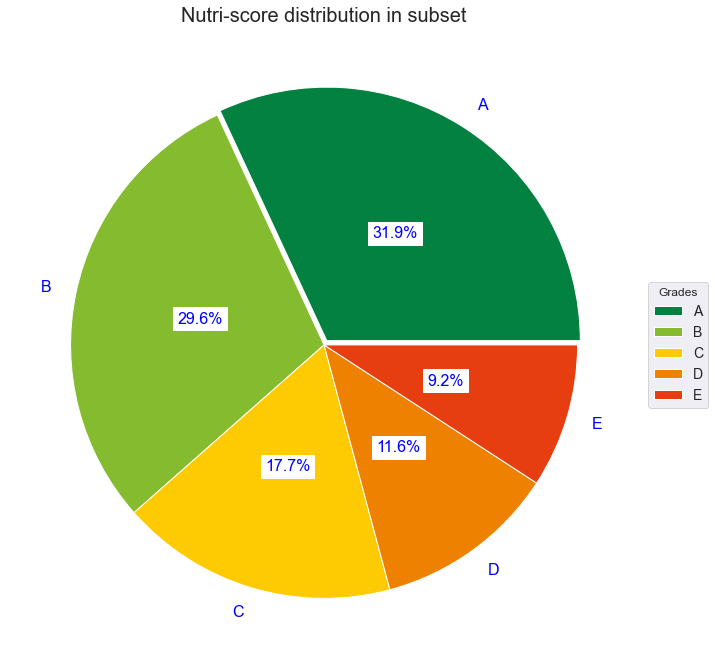

In [7]:
pie, ax = plt.subplots(figsize=[10,10])
plt.title("Nutri-score distribution in subset", size=20)
plt.pie(x=data_piechart, labels=labels_piechart, explode=explode, autopct="%1.1f%%", pctdistance=0.5, 
        textprops=textprops, colors=[colors[key] for key in labels_piechart], startangle=0)
ax.legend(labels_piechart, title="Grades", loc="center left", fontsize=14, bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.savefig("img/nutri-score-distribution.png")
plt.show()

<div class="alert alert-block alert-info">
 <b>Observations / Conclusions</b><br><br>
 
 Based on the <b>pie chart</b>, we get that most of the product <b>(61.29%)</b> are <b>classified</b> between grade <b>A</b> and grade <b>B.</b></br>
 Only the <b>20,8%</b> is <b>classified</b> between grade <b>D</b> and grade <b>E.</b>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2. Comparison of the variables in each category</h4>
</div>

<div class="alert alert-block alert-info">
    To limit the analysis to be performed, we are going to work following the next premises
    <ul style="list-style-type: square;">
        <li>Select only <b>4 variables</b> independent to work</li>
        <ul style="list-style-type: disc;">
            <li>energy-kcal_100g</li>
            <li>proteins_100g</li>
            <li>fat_100g</li>
            <li>sugars_100g</li>
        </ul>
        <li>We also consider the variable dependent <b>Nutri-Score</b></li>
    </ul>
</div>

In [8]:
VARIABLES = {
    "energy-kcal_100g":"Energy", "proteins_100g":"Proteins", "fat_100g":"Fat", "sugars_100g":"Sugars", "nutriscore_score":"Nutri-Score"
}

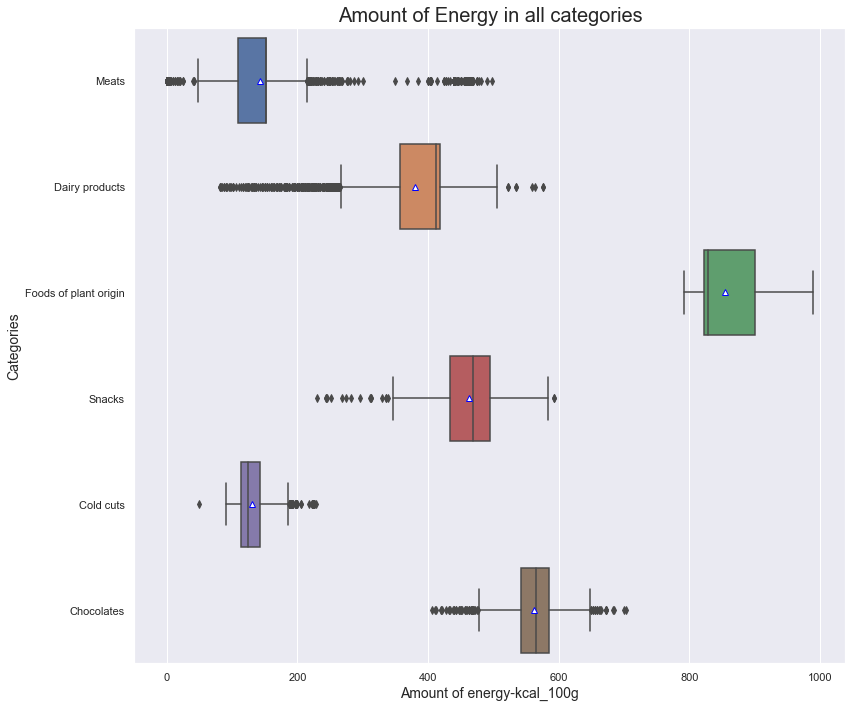

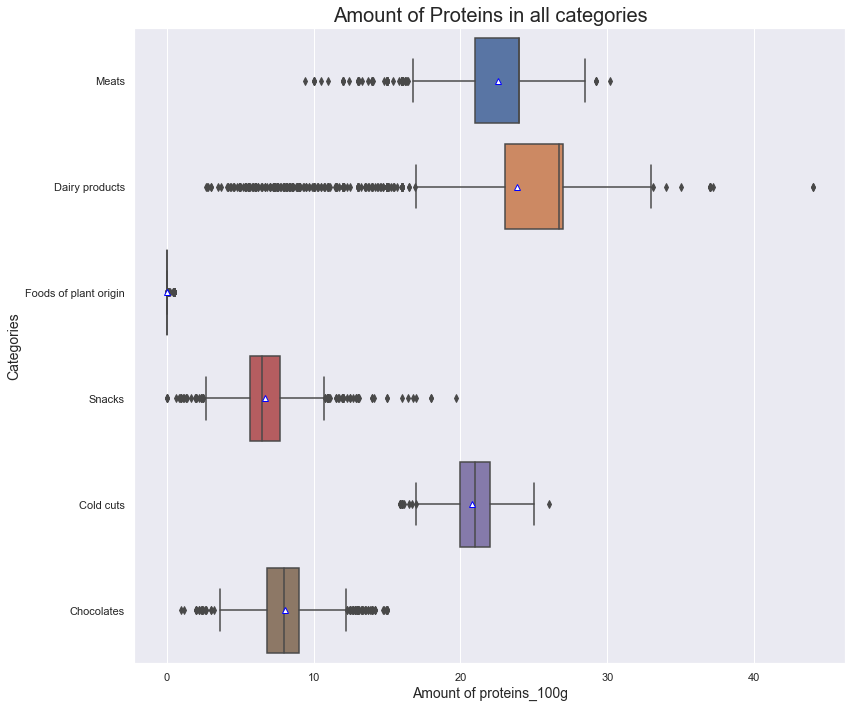

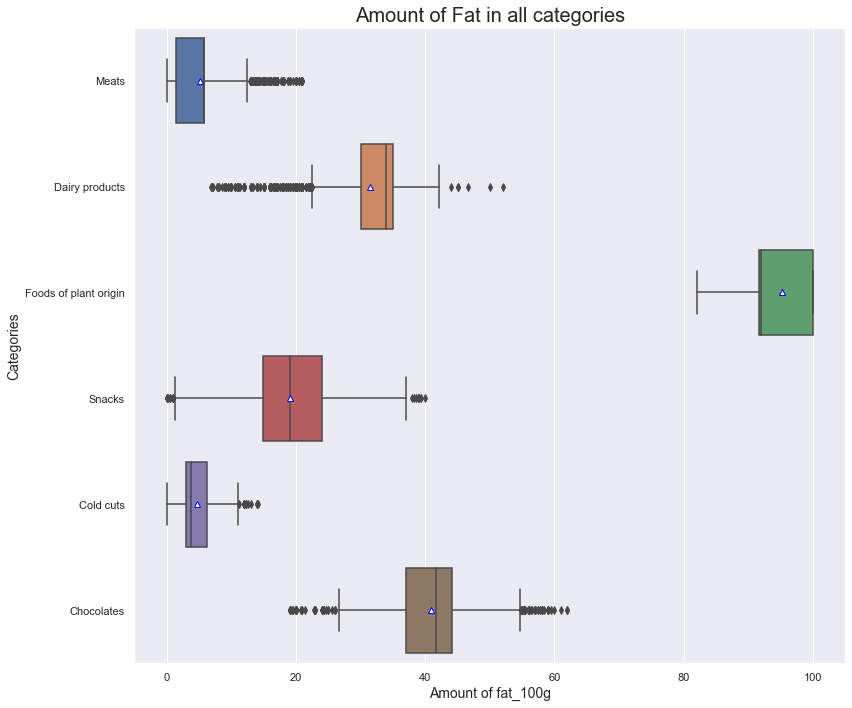

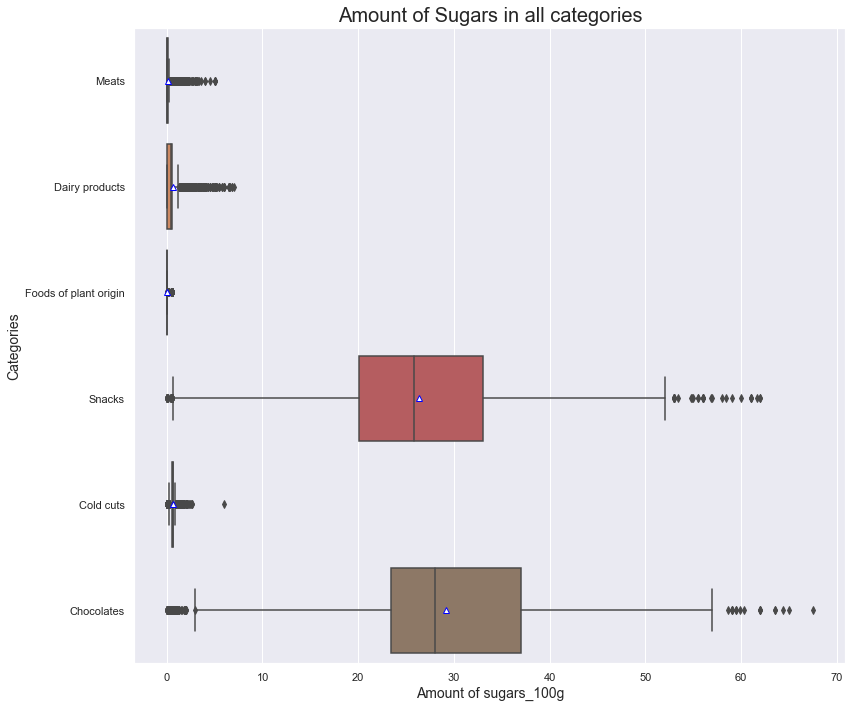

In [9]:
for var in VARIABLES:
    if var != "nutriscore_score":
        plt.figure(figsize=[12,10])
        sns.boxplot(x=data[var], y=data["renamed_category"], orient="h", showmeans=True, 
                    meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
        plt.title("Amount of " + VARIABLES.get(var) + " in all categories", size=20)
        plt.ylabel("Categories", size=14)
        plt.xlabel("Amount of " + var, size=14)
        plt.tight_layout()
        plt.savefig("img/comparison-of-" + VARIABLES.get(var) + "-in-each-category.png")
        plt.show()

In [ ]:
XXXXXXXXXXXXXXXXXXXXXXXXXXX

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4. Univariate analysis</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">4.1. Select a subset of data</h4>
</div>

<div class="alert alert-block alert-info">
    To limit the analysis to be performed, we are going to work only with <b>3 categories</b>
</div>

In [10]:
data.groupby("renamed_category")["code"].count().sort_values(ascending=False)

renamed_category
Meats                    6141
Dairy products           2469
Foods of plant origin    2125
Snacks                   1936
Cold cuts                1934
Chocolates               1811
Name: code, dtype: int64

<div class="alert alert-block alert-info">
    Filtering the dataset based on the <b>3 categories</b> selected
</div>

In [11]:
df_subset = data[data["renamed_category"].isin(["Meats", "Dairy products", "Snacks"])].copy()

In [12]:
df_subset.shape

(10546, 16)

In [13]:
df_analysis(df_subset, "df_subset", "code", flag="complete")


Analysis of df_subset dataset
--------------------------------------------------------------------
- Dataset shape:                  10546 rows and 16 columns
- Total of NaN values:            3534
- Percentage of NaN:              2.09 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): code is not present multiple times in the dataframe.
  It CAN be used as a primary key.

- Type object and records by columns                                                                   ( memory usage: 1.4+ MB )
---------------------------------------------------------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,code,object,10546,10546,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,last_modified_datetime,object,10546,6978,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,main_category,object,10546,6,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,categories,object,10546,6,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,renamed_category,object,10546,3,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,energy-kcal_100g,float64,10546,760,0,0.00,256.878561,0.0,151.00,168.00,418.0,593.0,152.886324
8,fat_100g,float64,10546,543,0,0.00,13.872979,0.0,5.80,7.10,24.0,52.0,12.124006
9,carbohydrates_100g,float64,10546,616,0,0.00,12.286070,0.0,0.10,0.46,1.6,91.0,24.995366
10,saturated-fat_100g,float64,10546,490,0,0.00,7.136162,0.0,1.40,1.60,14.0,33.0,8.533508
11,sugars_100g,float64,10546,522,0,0.00,5.084307,0.0,0.00,0.02,1.0,62.0,11.130282


<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">4.2. Variables distribution</h4>
</div>

In [14]:
NUMERIC_COLS_APP = []
for col in df_subset.columns:
    if df_subset[col].dtype == "float64":
        NUMERIC_COLS_APP.append(col)

<div class="alert alert-block alert-info">
    <b>Plotting</b> the variables distribution for each category
</div>

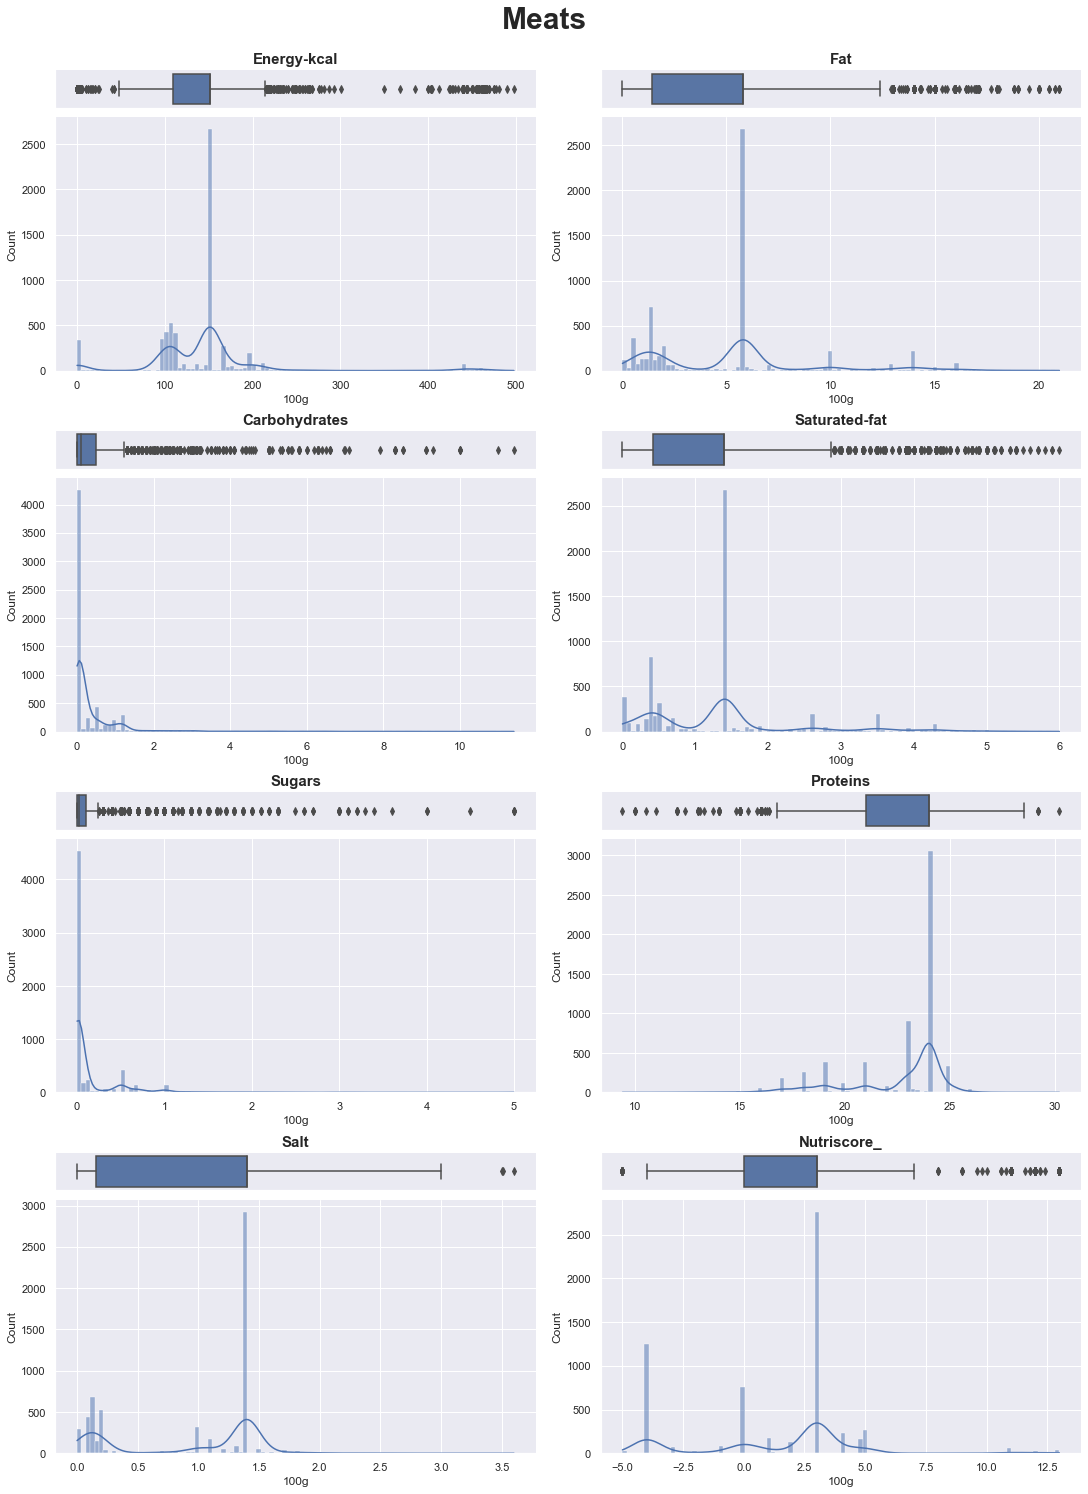

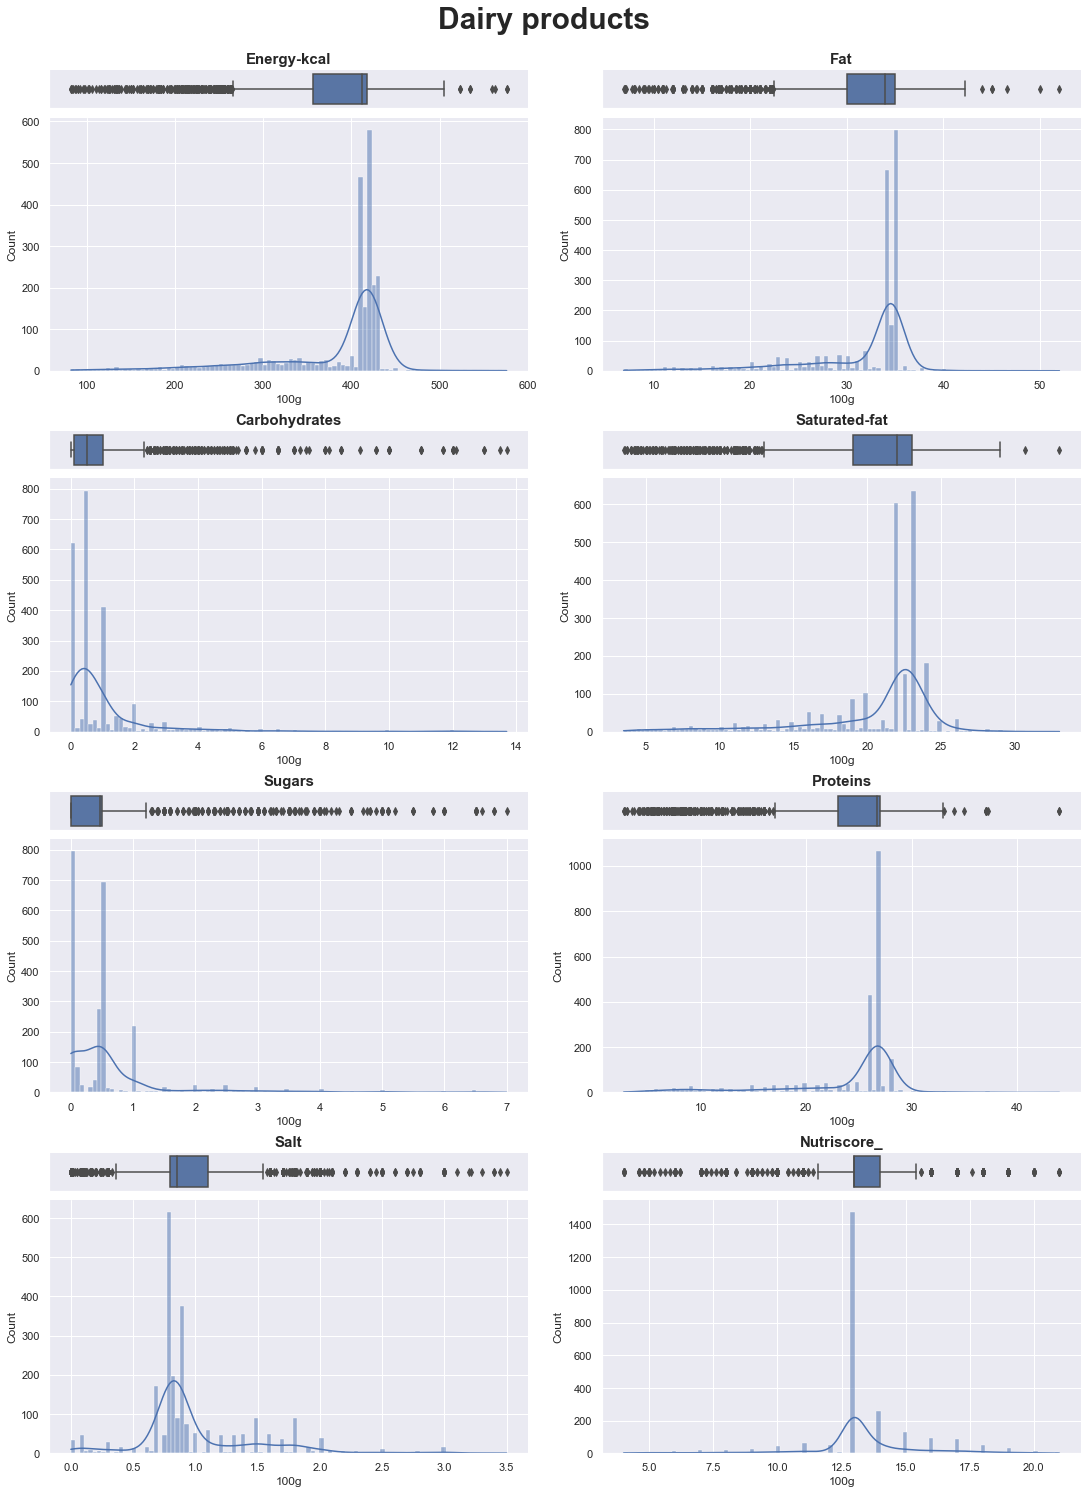

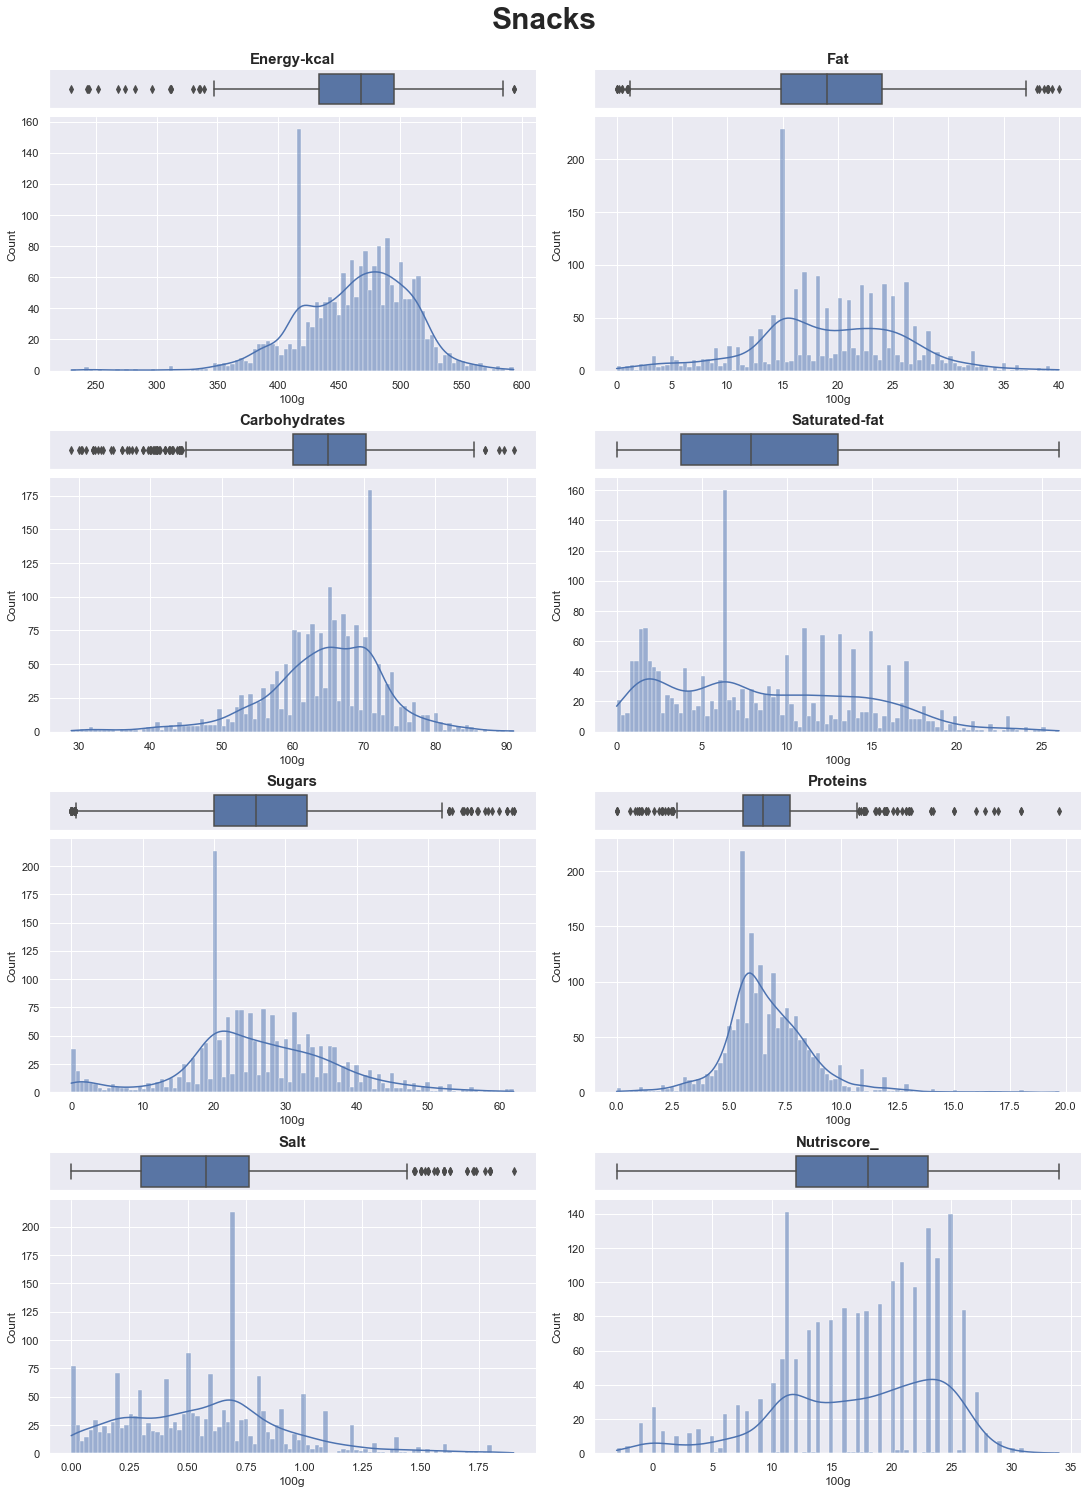

In [15]:
for category in df_subset["renamed_category"].unique():
    
    df_temp_by_cat = df_subset[df_subset["renamed_category"] == category].copy()
    
    fig = plt.figure(constrained_layout=True, figsize=[15,20])
    fig.suptitle(category, size=30, fontweight="bold", y=1.03)
    spec = fig.add_gridspec(ncols=2, nrows=8, width_ratios=[1,1], height_ratios=[0.3,2,0.3,2,0.3,2,0.3,2])
    
    # to cycle through the columns 
    col_boxplot, col_histplot = 0, 0
    
    for i in range(8):
        
        for j in range(2):
            
            if i % 2 == 0:
                
                if col_boxplot > len(NUMERIC_COLS_APP) - 1:
                    break
                    
                ax_box = fig.add_subplot(spec[i, j])
                boxplot = sns.boxplot(data=df_temp_by_cat, x=NUMERIC_COLS_APP[col_boxplot], ax=ax_box)
                
                # Remove x axis name for the boxplot
                ax_box.set(xlabel="", xticks=[])
                ax_box.set(yticks=[])
                
                boxplot.set_title(NUMERIC_COLS_APP[col_boxplot][0:-5].capitalize(), fontdict={ "fontsize": 15, "fontweight": "bold" })
                
                col_boxplot += 1
                
            elif i % 2 != 0:
                
                if col_histplot > len(NUMERIC_COLS_APP) - 1:
                    break
                
                ax_hist = fig.add_subplot(spec[i, j])
                sns.histplot(data=df_temp_by_cat, x=NUMERIC_COLS_APP[col_histplot], bins=100,  kde=True,  ax=ax_hist)
                ax_hist.set(xlabel="100g")
                
                col_histplot += 1
    
#     plt.savefig("img/nan-" + category + ".png", bbox_inches="tight")
    sns.despine(fig)    

<div class="alert alert-block alert-danger">
    <b>Flag position</b>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">4.3. Normality test</h4>
</div>

<div style="background-color: #6D83C5;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">4.3.1. Shapiro-Wilk Test</h5>
</div>

In [41]:
Shapiro_Wilk = []

In [44]:
df_subset["renamed_category"].unique().tolist()

['Snacks']

In [49]:
NUMERIC_COLS_APP

['energy-kcal_100g',
 'fat_100g',
 'carbohydrates_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'nutriscore_score']

In [50]:
for col in df_subset.columns:
    if col in NUMERIC_COLS_APP:
        shapiro_stat, shapiro_value = stats.shapiro(df_subset[col])
        print(col, "shapiro test:", shapiro_value)

energy-kcal_100g shapiro test: 6.974275727428572e-18
fat_100g shapiro test: 9.08774056007644e-10
carbohydrates_100g shapiro test: 2.7859049231422086e-21
saturated-fat_100g shapiro test: 7.4637617008161e-24
sugars_100g shapiro test: 2.4656713519032936e-16
proteins_100g shapiro test: 4.396826322145631e-28
salt_100g shapiro test: 2.885522308545777e-20
nutriscore_score shapiro test: 1.4896413882973905e-23


<div class="alert alert-block alert-danger">
    <b>Flag position</b>
</div>

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5. Bivariate analysis</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.1. Select a subset of data</h4>
</div>

<div class="alert alert-block alert-info">
    To limit the analysis to be performed, we are going to work only with <b>1 categories</b>, in this case <b>Snacks</b>
</div>

In [16]:
data.groupby("renamed_category")["code"].count().sort_values(ascending=False)

renamed_category
Meats                    6141
Dairy products           2469
Foods of plant origin    2125
Snacks                   1936
Cold cuts                1934
Chocolates               1811
Name: code, dtype: int64

In [17]:
df_subset = data[data["renamed_category"].isin(["Snacks"])].copy()

In [18]:
df_subset.shape

(1936, 16)

In [19]:
df_analysis(df_subset, "df_subset", "code", flag="complete")


Analysis of df_subset dataset
--------------------------------------------------------------------
- Dataset shape:                  1936 rows and 16 columns
- Total of NaN values:            264
- Percentage of NaN:              0.85 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): code is not present multiple times in the dataframe.
  It CAN be used as a primary key.

- Type object and records by columns                                                                   ( memory usage: 257.1+ KB )
---------------------------------------------------------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,code,object,1936,1936,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,last_modified_datetime,object,1936,1902,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,main_category,object,1936,1,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,categories,object,1936,1,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,renamed_category,object,1936,1,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,energy-kcal_100g,float64,1936,380,0,0.00,463.275483,230.0,433.000,468.00,495.000000,593.000000,45.314214
8,fat_100g,float64,1936,328,0,0.00,19.109066,0.0,14.840,19.00,24.000000,40.000000,6.803020
9,carbohydrates_100g,float64,1936,374,0,0.00,64.395341,28.9,60.000,65.00,70.300003,91.000000,8.434375
10,saturated-fat_100g,float64,1936,275,0,0.00,8.634710,0.0,3.775,7.90,13.000000,26.000000,5.675293
11,sugars_100g,float64,1936,411,0,0.00,26.355495,0.0,20.040,25.85,33.000000,62.000000,10.892756


<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.2. Pearson correlation</h4>
</div>

<div class="alert alert-block alert-info">
    To limit the analysis to be performed, we are going to work only with <b>1 categories</b>, in this case <b>Snacks</b>
</div>

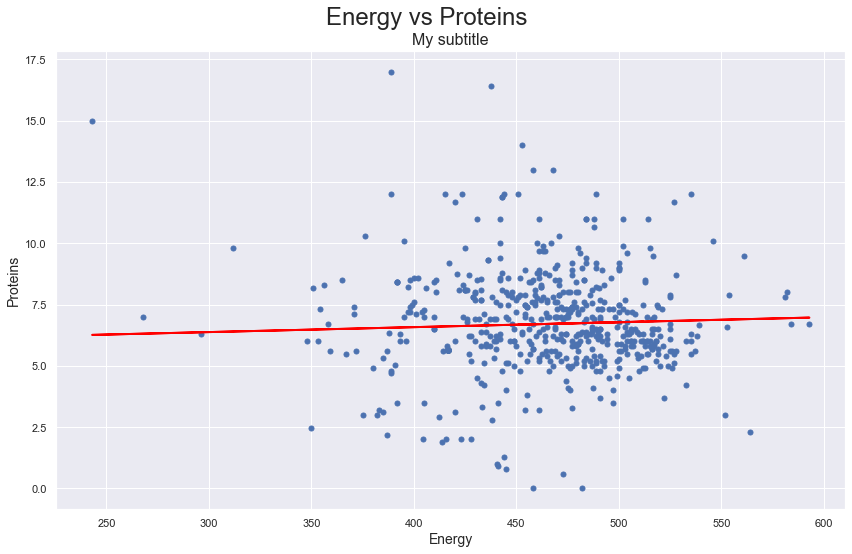

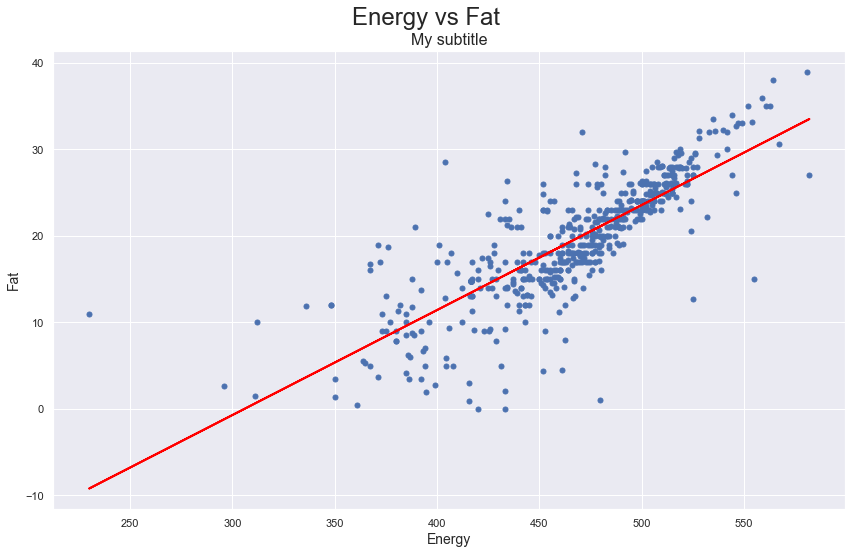

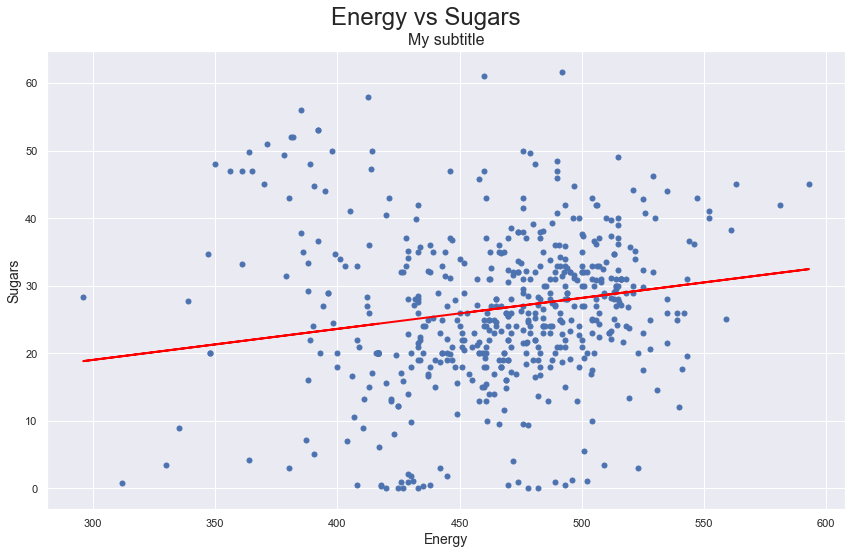

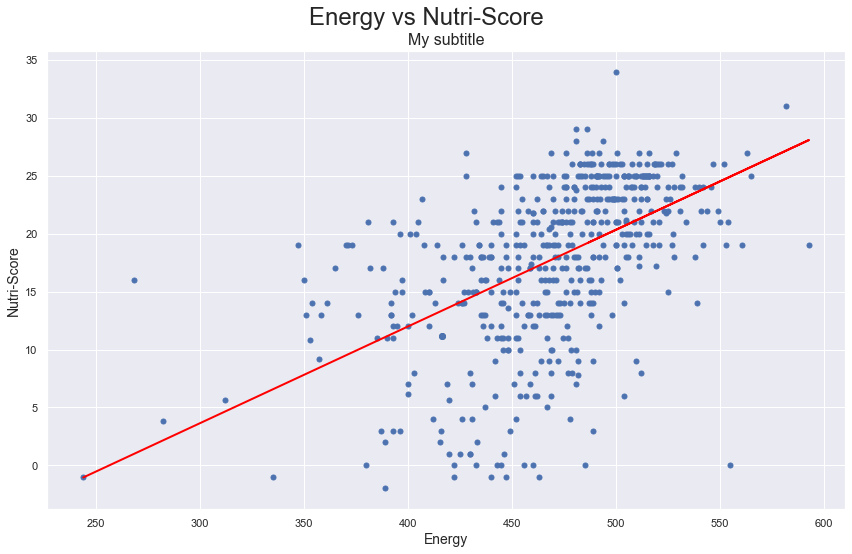

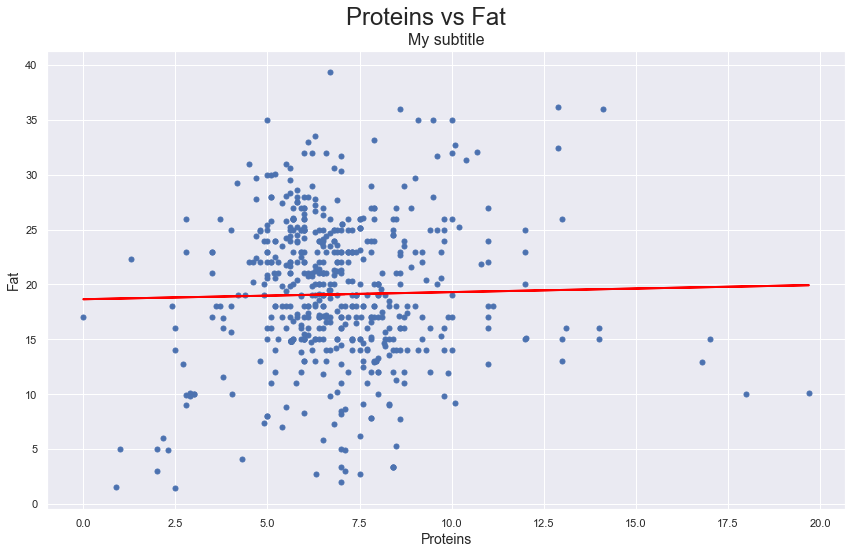

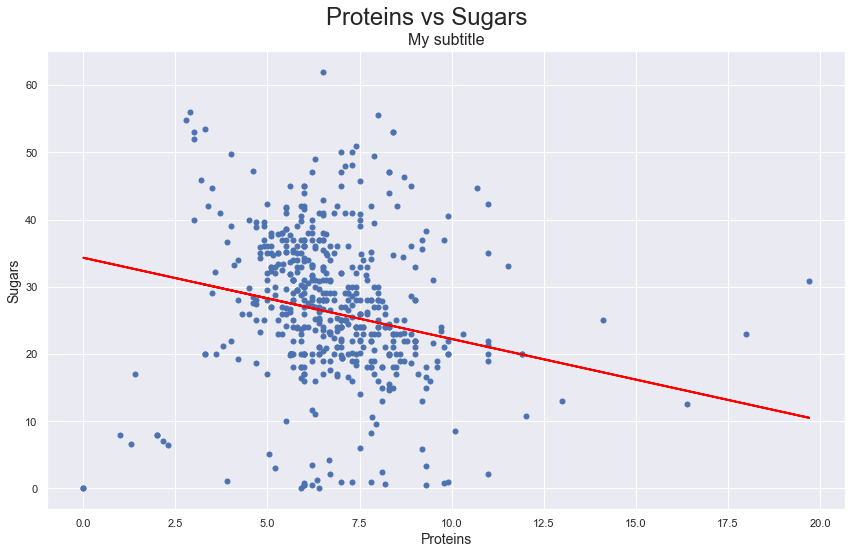

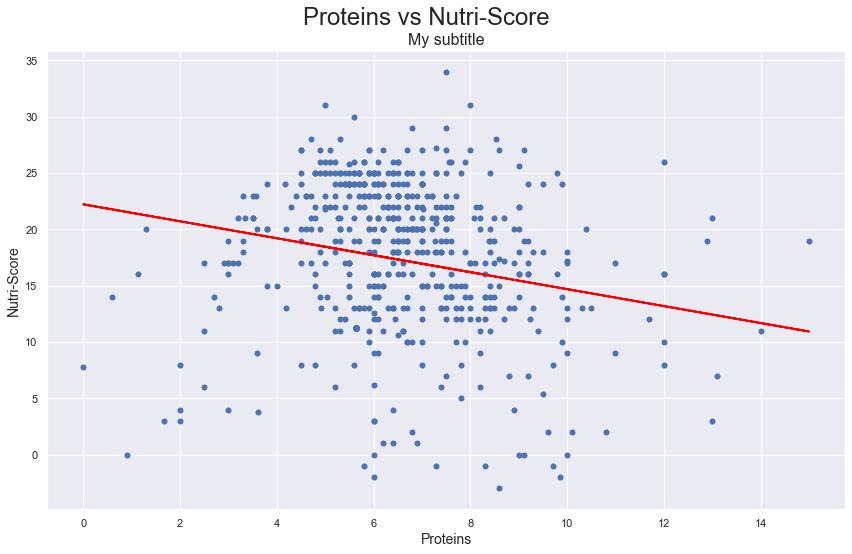

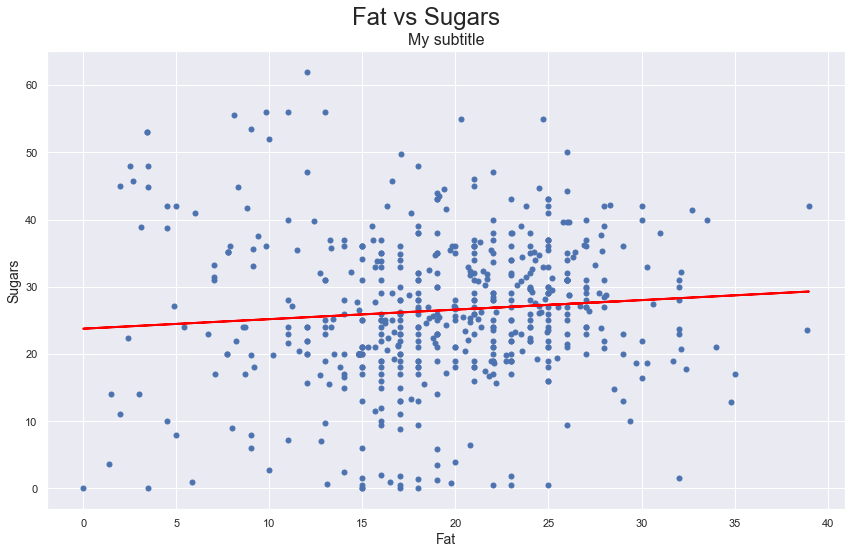

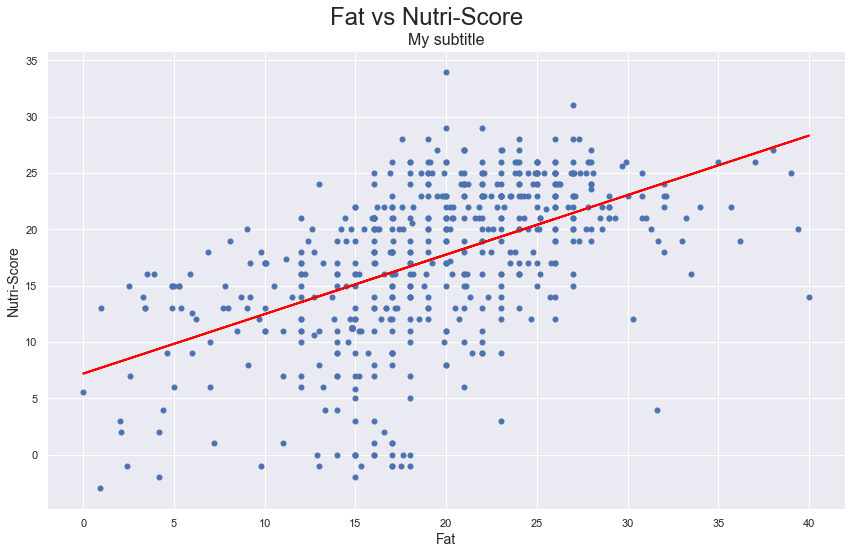

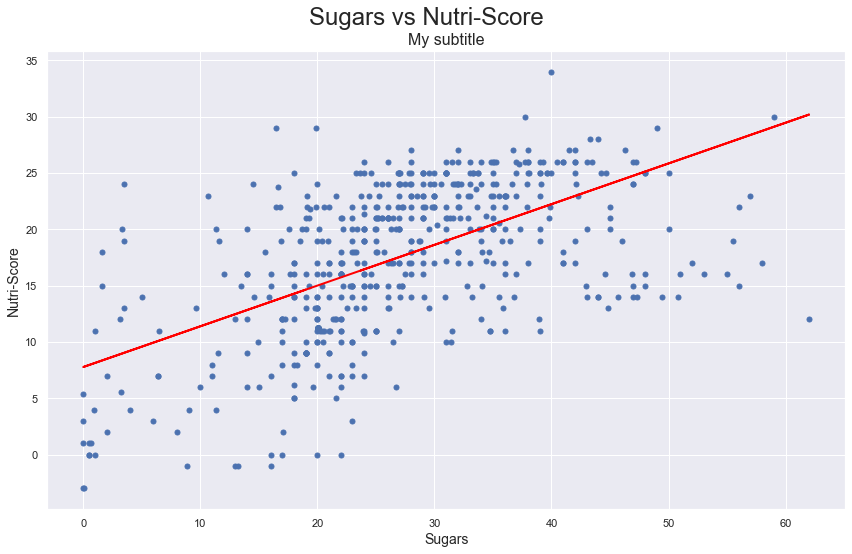

,variables,Coef.,MSE,RMSE,R2SCORE
0,Energy vs Proteins,0.0020,4.23,2.06,-0.00
1,Energy vs Fat,0.1214,15.41,3.92,0.66
2,Energy vs Sugars,0.0459,120.27,10.97,0.02
3,Energy vs Nutri-Score,0.0835,33.55,5.79,0.31
4,Proteins vs Fat,0.0649,41.90,6.47,0.00
5,Proteins vs Sugars,-1.2081,111.57,10.56,0.00
6,Proteins vs Nutri-Score,-0.7527,43.55,6.60,0.00
7,Fat vs Sugars,0.1416,114.62,10.71,0.01
8,Fat vs Nutri-Score,0.5281,34.43,5.87,0.30
9,Sugars vs Nutri-Score,0.3614,30.77,5.55,0.31


In [20]:
list_variables, list_COEF, list_MSE, list_RMSE, list_R2SCORE = ([] for i in range(5))

for a, b in itertools.combinations(VARIABLES, 2):
    
    # initializing Linear Regression by Pearson
    lr = LinearRegression()
    xtrain, xtest, ytrain, ytest = train_test_split(df_subset[[a]], df_subset[[b]], test_size=0.3)
    lr = LinearRegression()
    lr_baseline = lr.fit(xtrain, ytrain)
    pred_baseline = lr_baseline.predict(xtest)
    
    list_variables.append(VARIABLES.get(a) + " vs " + VARIABLES.get(b))
    list_COEF.append(round(lr_baseline.coef_[0,0], 4))
    list_MSE.append(round(mean_squared_error(ytest, pred_baseline), 2))
    list_RMSE.append(round(math.sqrt(mean_squared_error(ytest, pred_baseline)), 2))
    list_R2SCORE.append(round(r2_score(ytest, pred_baseline), 2))
    
    # PLotting the graph
    plt.figure(figsize=(12,8))
    ax = plt.gca()
    
    plt.suptitle(VARIABLES.get(a) + " vs " + VARIABLES.get(b), fontsize=24, y=0.96)
    plt.title('My subtitle',fontsize=16)
    plt.plot(xtest, ytest, 'bo', markersize = 5)
    plt.plot(xtest, pred_baseline, color="red", linewidth = 2)
    plt.xlabel(VARIABLES.get(a), size=14)
    plt.ylabel(VARIABLES.get(b), size=14)
    plt.tight_layout()
    plt.savefig("img/correlation-" + VARIABLES.get(a) + "-vs-" + VARIABLES.get(b) + ".png")
    plt.show()
    
df_metrics_bivariate = pd.DataFrame({
    "variables":list_variables,
    "Coef.":list_COEF,
    "MSE":list_MSE,
    "RMSE":list_RMSE,
    "R2SCORE":list_R2SCORE
})
df_metrics_bivariate

<div class="alert alert-block alert-info">
    <b>Observations / Conclusions</b><br><br>
    
    <b>Coefficient.</b><br>
    <ul style="list-style-type: square;">
       <li><b>Proteins vs Sugars</b> have an inverse relationship</li>
       <li><b>Proteins vs Nutri-Score</b> have an inverse relationship</li>
       <li><b>Fat vs Nutri-Score</b> have a strong direct relationship</li>
       <li><b>Sugars vs Nutri-Score</b> have a weak direct relationship</li>
       <li><b>Energy vs Nutri-Score</b> don't have a relationship</li>
       <li><b>Energy vs Sugars</b> don't have a relationship</li>
    </ul>
 
    <b>MSE</b><br>
    
    <ul style="list-style-type: square;">
       <li>The <b>best</b> result are:</li>
       <ul style="list-style-type: disc;">
           <li>Energy vs Proteins: 4.02</li>
           <li>Energy vs Fat: 13.37</li>
           <li>Sugars vs Nutri-Score: 30.96</li>
        </ul>
    </ul>
    
    <b>R² - Score</b><br>
    As we know, the closer the value of r2 is to 1, the greater the fit of the model to the variable we are trying to explain.
    
    <ul style="list-style-type: square;">
       <li>The <b>tightest values</b> based on <b>R²</b> are:</li>
       <ul style="list-style-type: disc;">
           <li>Energy vs Fat: 0.65</li>
           <li>Sugar vs Nutri-Score: 0.33</li>
           <li>Energy vs Nutri-Score: 0.30</li>
        </ul>
        <li>The <b>least values</b> based on <b>R²</b> are:</li>
       <ul style="list-style-type: disc;">
           <li>Energy vs Proteins: 0.00</li>
           <li>Proteins vs Fat: 0.00</li>
           <li>Fat vs Sugar: 0.00</li>
           <li>Proteins vs Nutri-Score: 0.01</li>
           <li>Proteins vs Sugar: 0.04</li>
        </ul>
    </ul>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.3. Correlation Matrix</h4>
</div>

<div class="alert alert-block alert-info">
    Calculating the <b>correlation</b> between two features through <b>Pearson</b>
</div>

In [21]:
df_subset_correlation = pd.DataFrame(df_subset, columns=VARIABLES.keys())

In [22]:
df_correlation_matrix = pd.DataFrame(df_subset_correlation.corr())

In [23]:
df_correlation_matrix

,energy-kcal_100g,proteins_100g,fat_100g,sugars_100g,nutriscore_score
energy-kcal_100g,1.000000,0.025302,0.805292,0.177497,0.558667
proteins_100g,0.025302,1.000000,0.031849,-0.188852,-0.185729
fat_100g,0.805292,0.031849,1.000000,0.087783,0.539165
sugars_100g,0.177497,-0.188852,0.087783,1.000000,0.571086
nutriscore_score,0.558667,-0.185729,0.539165,0.571086,1.000000


In [24]:
mask = np.zeros_like(df_correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True 

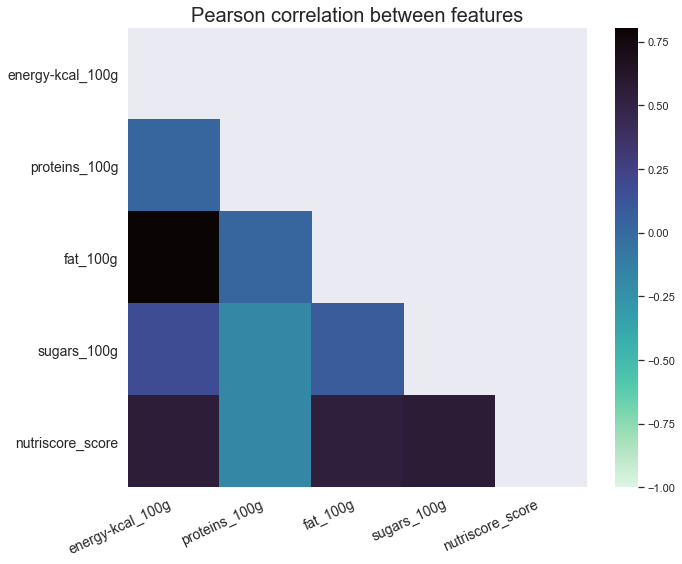

In [25]:
plt.figure(figsize=(10,8))
plt.title("Pearson correlation between features", size=20)

ax = sns.heatmap(df_correlation_matrix, mask=mask, vmin=-1, cmap="mako_r")

plt.xticks(rotation=25, size=14, horizontalalignment="right")
plt.yticks(rotation=0, size=14)
plt.tight_layout()
plt.savefig("img/pearson-correlation-between-features.png")
plt.show()

<div class="alert alert-block alert-info">
    <b>Observations / Conclusions</b>
    
        <ul style="list-style-type: square;">
            <li><b>Energy-kcal_100g</b> has a strong direct relation with <b>fat_100g</b> and <b>nutriscore_score</b></li>
            <li><b>proteins_100g</b> has a weak relation with <b>sugars_100g</b> and <b>nutriscore_score</b></li>
            <li><b>fat_100g</b> has significant relation with <b>sugars_100g</b> and strong relation with <b>nutriscore_score</b></li>
            <li><b>sugars_100g</b> has a strong relation with <b>nutriscore_score</b></li>
            <li><b>proteins_100g</b> has an inverse relation with <b>nutriscore_score</b> and <b>sugars_100g</b></li>
        </ul>               
</div>

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6. Multivariate Analysis</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.1. Plotting Variables considering categories</h4>
</div>

<div class="alert alert-block alert-info">
    To make a <b>Multivariate Analysis</b>, we are going to <b>filter</b> the dataset only in <b>4 variables</b> and <b>3 categories</b>
</div>

In [27]:
df_multi_analysis = data[["renamed_category", "energy-kcal_100g", "proteins_100g", "sugars_100g", "nutriscore_score"]].copy()

In [28]:
df_multi_analysis = df_multi_analysis[df_multi_analysis["renamed_category"].isin(["Meats", "Dairy products", "Snacks"])]

In [29]:
df_multi_analysis.rename(columns = {"renamed_category":"category"}, inplace=True)

In [30]:
df_multi_analysis.head(3)

,category,energy-kcal_100g,proteins_100g,sugars_100g,nutriscore_score
0,Meats,197.0,17.0,0.90,4.0
1,Meats,206.0,16.0,1.70,5.0
2,Meats,151.2,24.0,0.02,3.0


In [31]:
df_analysis(df_multi_analysis, "df_multi_analysis", "category", flag="complete")


Analysis of df_multi_analysis dataset
--------------------------------------------------------------------
- Dataset shape:                  10546 rows and 5 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  6941
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): category is present multiple times in the dataframe.
  It CANNOT be used as a primary key.

- Type object and records by columns                                                                   ( memory usage: 494.3+ KB )
---------------------------------------------------------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,category,object,10546,3,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,energy-kcal_100g,float64,10546,760,0,0.0,256.878561,0.0,151.00,168.00,418.0,593.0,152.886324
2,proteins_100g,float64,10546,444,0,0.0,19.961134,0.0,18.00,24.00,24.0,44.0,7.227759
3,sugars_100g,float64,10546,522,0,0.0,5.084307,0.0,0.00,0.02,1.0,62.0,11.130282
4,nutriscore_score,float64,10546,152,0,0.0,7.019856,-5.0,2.45,3.00,13.0,34.0,7.967160


<div class="alert alert-block alert-info">
    Plotting the variables considering the categories
</div>

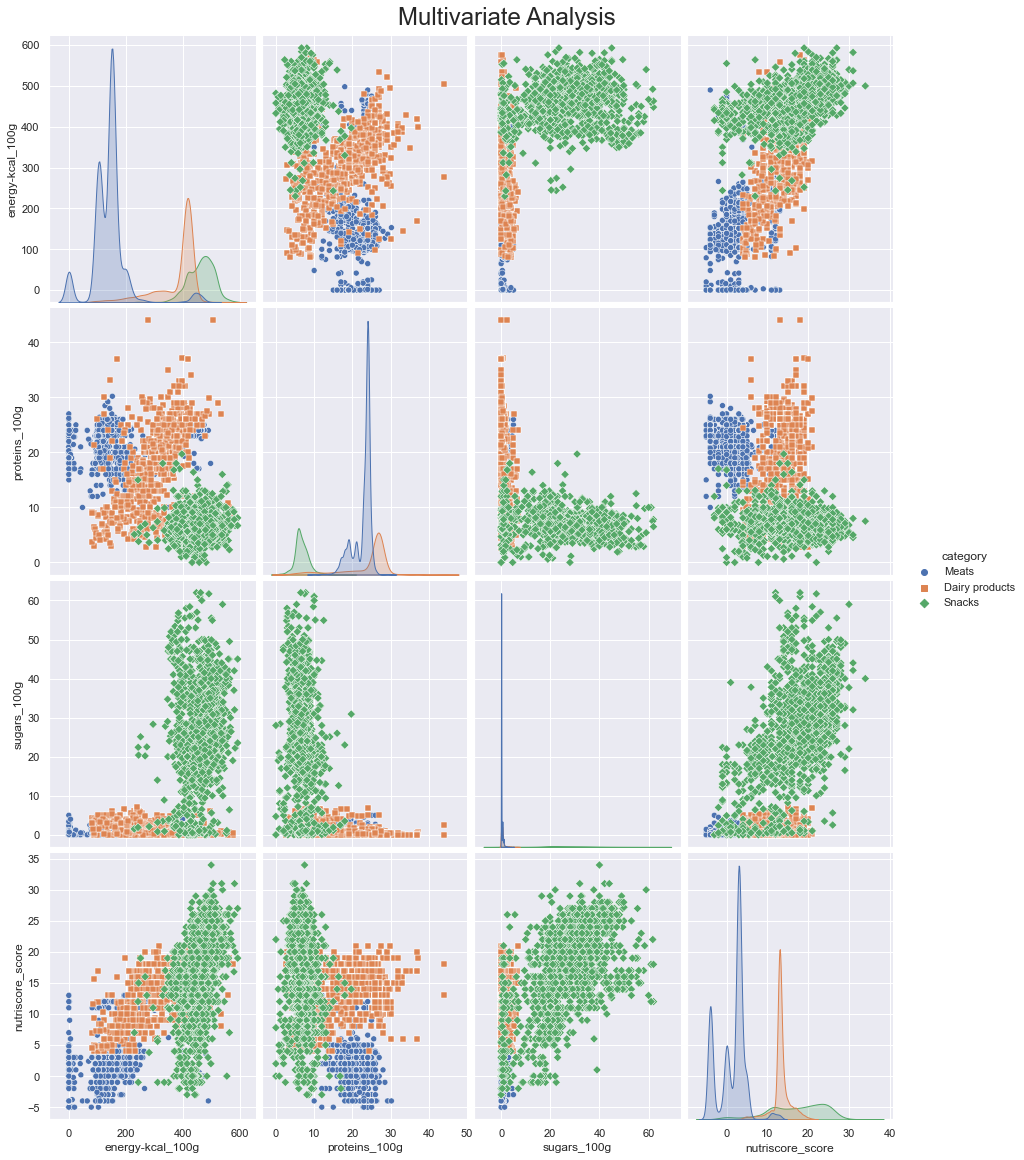

In [32]:
g = sns.pairplot(df_multi_analysis, hue="category", markers=["o", "s", "D"], height=4, aspect=0.8)
g.fig.suptitle("Multivariate Analysis", y=1.01 , size=24)
plt.savefig("img/correlation-categories-vs-variables.png")
plt.show()

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.2. Correlation Matrix by Caterory</h4>
</div>

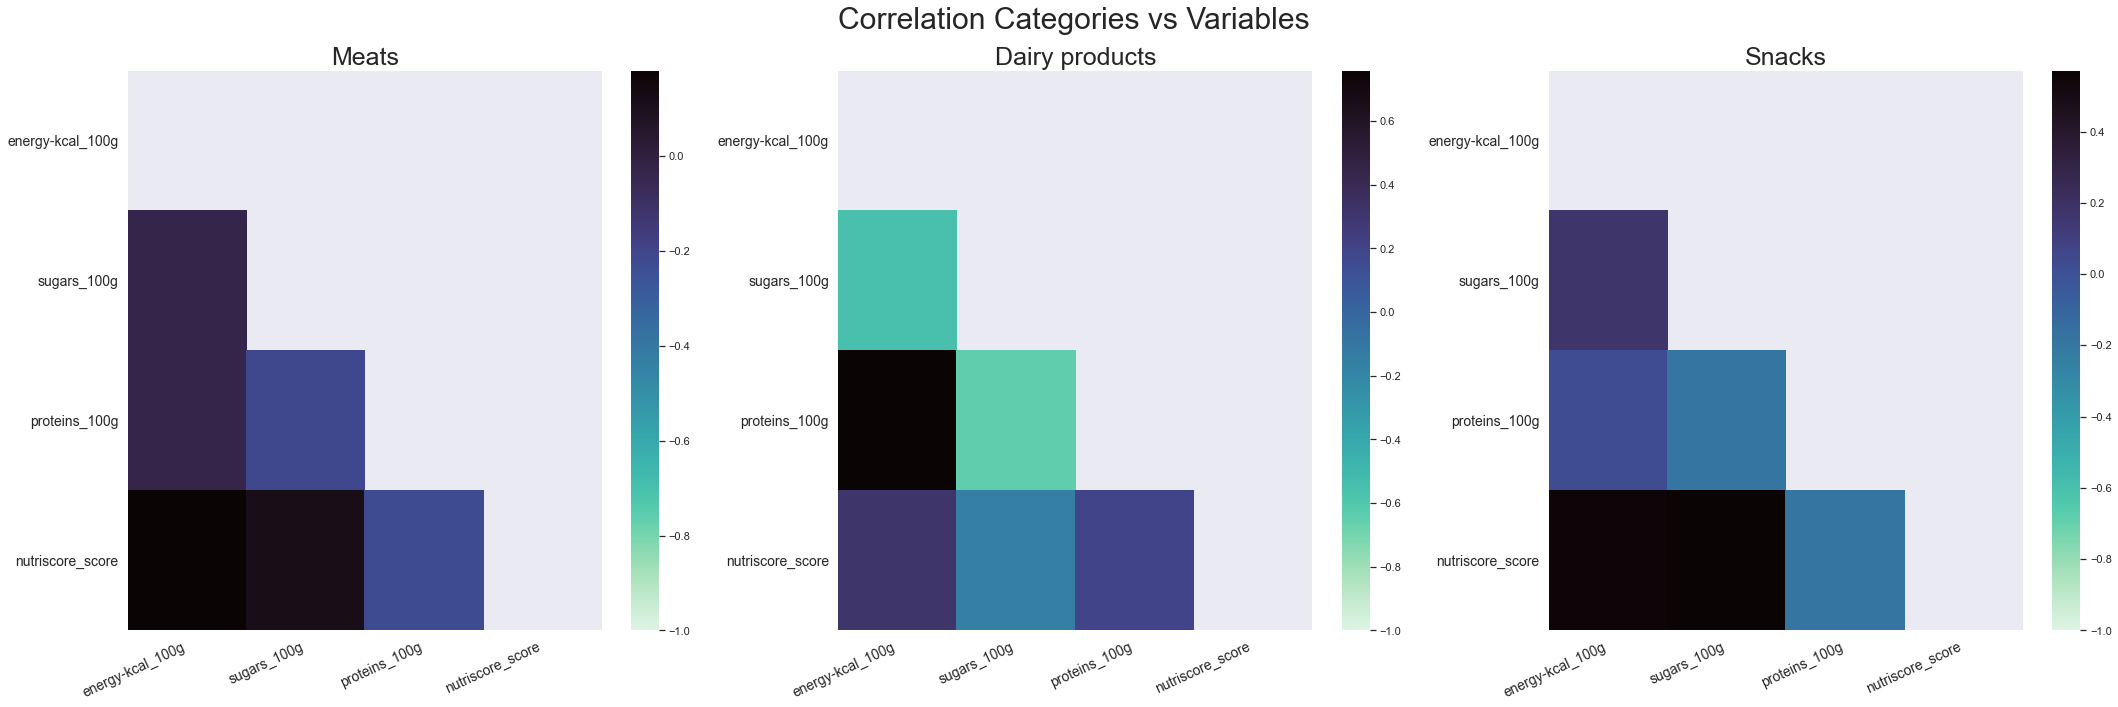

In [33]:
# Creating a figure composed of multiples matplotlib.Axes objects (ax_box and ax_hist)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[30,10])

plt.suptitle("Correlation Categories vs Variables", size=30)

VARIABLES_MULTI_ANALYSIS = ["energy-kcal_100g", "sugars_100g", "proteins_100g", "nutriscore_score"]

for category, ax in zip(df_multi_analysis["category"].unique(), axs.reshape(-1)):
    
    # Filtering the dataframe based on category
    df_temp = df_multi_analysis[df_multi_analysis["category"] == category][VARIABLES_MULTI_ANALYSIS]
    df_multi_analysis_correlation = pd.DataFrame(df_temp.corr())
    
    # Adding a mask not to show all blocks
    mask = np.zeros_like(df_multi_analysis_correlation, dtype=bool)
    mask[np.triu_indices_from(mask)] = True 
    
    sns.heatmap(df_multi_analysis_correlation, mask=mask, vmin=-1, cmap="mako_r", ax=ax)
    
    ax.set_title(category, size=25)
    ax.set_xticklabels(VARIABLES_MULTI_ANALYSIS, rotation=25, size=14, horizontalalignment="right")
    ax.set_yticklabels(VARIABLES_MULTI_ANALYSIS, rotation=0, size=14)
    
plt.tight_layout()
plt.savefig("img/correlation-categories-vs-variables.png")
plt.show()

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.3. Correlation Matrix all Categories vs Variables</h4>
</div>

In [35]:
df_all_variables_multi_analysis = df_multi_analysis[VARIABLES_MULTI_ANALYSIS]

In [36]:
df_correlation_matrix = pd.DataFrame(df_all_variables_multi_analysis.corr())

In [37]:
df_correlation_matrix

,energy-kcal_100g,sugars_100g,proteins_100g,nutriscore_score
energy-kcal_100g,1.000000,0.594859,-0.442633,0.831303
sugars_100g,0.594859,1.000000,-0.807888,0.647873
proteins_100g,-0.442633,-0.807888,1.000000,-0.498728
nutriscore_score,0.831303,0.647873,-0.498728,1.000000


In [38]:
mask = np.zeros_like(df_correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True 

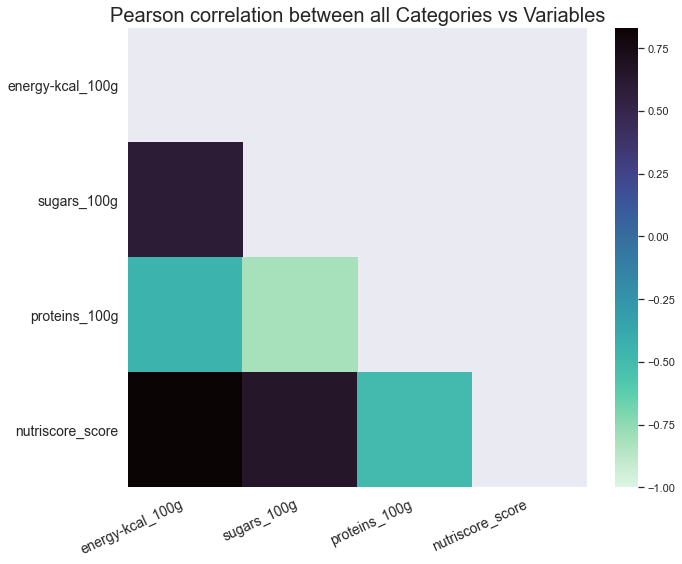

In [39]:
plt.figure(figsize=(10,8))
plt.title("Pearson correlation between all Categories vs Variables", size=20)

ax = sns.heatmap(df_correlation_matrix, mask=mask, vmin=-1, cmap="mako_r")

plt.xticks(rotation=25, size=14, horizontalalignment="right")
plt.yticks(rotation=0, size=14)
plt.tight_layout()
plt.savefig("img/pearson-correlation-between-features.png")
plt.show()

<div style="background-color: red;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; "><b>ToDo</b></h3>
</div>

<div class="alert alert-block alert-info">
    <ul style="list-style-type: square;">
        <li>Normality test</li>
            <ul style="list-style-type: disc;">
               <li>Shapiro-Wilk Test</li>
               <li>Anderson-Darling Test</li>
               <li>Test de Kolmogorov-Smirnov</li>
            </ul>
        <li>Anova (comparison between categories (meats, snack, Dairy products)</li> 
        <li>Principal Component Analysis - PCA</li>
    </ul>
</div>